# 특성 추출을 사용한 차원 축소

- 목적: 특성에 내재된 정보는 많이 유지하면서 특성 집합을 새로운 집합으로 변환하는 것


### 주성분을 사용해 특성 줄이기

- PCA는 데이터 분산을 유지하면서 특성의 수를 줄이는 선형 차원 축소 기법임
- PCA는 비지도 학습 기법임
- 타깃 벡터의 정보를 사용하지 않고 특성 행렬만 이용
- n_components의 입력 매개변수값이 1보다 그면 개수만큼 특성 반환
- n_components가 0~1이면 PCA는 해당 비율의 분산을 유지하는 최소의 특성 갯수 반환
- whiten=True로 지정하면 각 주성분의 값을 평균:0, 분산:1이 되도록 변환
- solver='randomized'는 짧은 시간에 첫 번째 주성분을 찾아주는 확률적 알고리즘 사용

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

#8*8크기의 손글씨 숫자 데이터 로드
digits=datasets.load_digits()
#특성 행렬을 표준화 처리
features=StandardScaler().fit_transform(digits.data)

#99%분산을 유지하는 PCA클래스 객체 생성
pca=PCA(n_components=0.99,whiten=True)

features_pca=pca.fit_transform(features)

print('원본 특성 갯수:',features.shape[1])
print('줄어든 특성 갯수:',features_pca.shape[1])

원본 특성 갯수: 64
줄어든 특성 갯수: 54


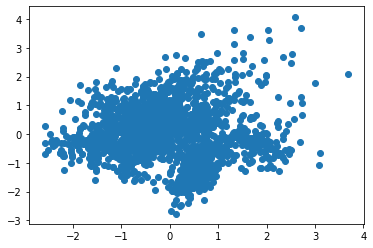

In [2]:
#주성분에 투영된 처음 두개의 특성을 사용해 산점도 출력
import matplotlib.pyplot as plt

plt.scatter(features_pca[:,0],features_pca[:,1])
plt.show()

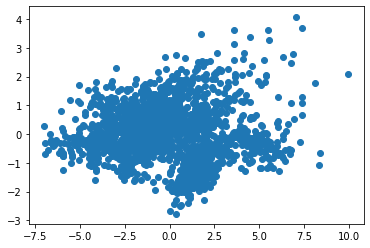

(54, 64)

In [6]:
pca_nowhiten=PCA(n_components=0.99)
features_nowhiten=pca_nowhiten.fit_transform(features)
plt.scatter(features_nowhiten[:,0],features_pca[:,1])
plt.show()

pca_nowhiten.components_.shape

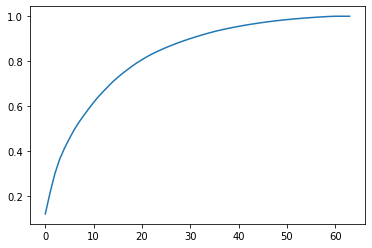

In [8]:
import numpy as np

#allclose를 사용하여 features_nowhiten배열과 동일한지 확인
np.allclose(features_nowhiten,np.dot(features,pca_nowhiten.components_.T))

pca=PCA(whiten=True).fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

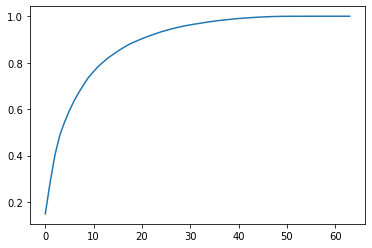

In [12]:
pca.fit(digits.data)
#cunsum을 사용 분산을 누적하여 그래프 출력
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()


#### 선형적으로 구분되지 않는 데이터의 차원 축소

- 커널 트릭을 사용, 주성분 분석의 확장을 사용하여 비선형 차원 축소 수행
- make_circles()는 선형적으로 구분되지 않는 데이터를 생성
- 하나의 클래스가 다른 클래스 안에 둘러 쌓임
- 선형 PCA를 사용하여 데이터 차원을 축소 시킨다면 두클래스가 첫번째 주성분에 선형적으로 투영 되기 때문에 서로 섞이게 됨
- 실제 고차원 공간으로 변환하는 것이 아니기 때문에 PCA처럼 주성분 얻을 수 없음
- kernel 매개변수의 기본값은 linear
- gamma 매개변수는 rbf,poly,sigmoid 커널에서 사용하는 계수, 기본값은 특성 개수의 역수
- degree 매개변수는 poly 커널에 사용하는 거듭제곱 수, 기본값:3
- coef()매개변수는 poly와 sigmoid커널에 사용되는 상수항으로 기본값:1

In [13]:
#커널 트릭은 실제 고차원으로 데이터를 변환하지 않으면서 고차원 데이터를 다루듯 효과를 냄
#여러가지 커널과 매개변수 조합으로 여러번 훈련시켜 높은 예측 성능을 만드는 값의 조합을 찾아냄
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

# 선형적으로 구분되지 않는 데이터를 생성
features, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)

# 방사 기저 함수(radius basis function, RBF)를 사용하여 커널 PCA 적용
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)

print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_kpca.shape[1])

원본 특성 개수: 2
줄어든 특성 개수: 1


#### 클래스 분리를 최대화함으로써 특성 줄이기

- 선형 판별 분석(LDA)를 사용하여 클래스를 최대한 분리하는 성분 축으로 특성 투영
- LDA는 분류 알고리즘이지만 차원 축소에도 자주 사용됨
- LDA는 특성 공간을 저차원 공간으로 투영
- PCA가 분산이 최대인 성분 축에만 관심이 있었지만 LDA는 클래스 간의 차이를 최대화하는 추가적인 목적 갖음
- LDA는 사이킷런의 LinearDiscriminantAnalysis 클래스로 구현
- LDA는 타깃 벡터 사용

In [14]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()
features = iris.data
target = iris.target

# LDA 객체를 만들고 실행하여 특성 변환
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)

print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_lda.shape[1])

#explained_variance_ratio_를 사용하여 각 성분이 설명하는 분산의 양 확인
lda.explained_variance_ratio_

원본 특성 개수: 4
줄어든 특성 개수: 1


array([0.9912126])

In [16]:
lda = LinearDiscriminantAnalysis(n_components=None) # LDA를 만들고 실행
features_lda = lda.fit(features, target)

# 설명된 분산의 비율이 담긴 배열을 저장합니다.
lda_var_ratios = lda.explained_variance_ratio_

def select_n_components(var_ratio, goal_var: float) -> int:
    total_variance = 0.0 # 설명된 분산의 초기값을 지정
    n_components = 0 # 특성 개수의 초깃값을 지정
    for explained_variance in var_ratio: # 각 특성의 설명된 분산을 순회
        total_variance += explained_variance # 설명된 분산 값을 누적
        n_components += 1 # 성분 개수를 카운트
        if total_variance >= goal_var: # 설명된 분산이 목표치에 도달하면
            break # 반복을 종료
        return n_components # 성분 개수를 반환
    
    
select_n_components(lda_var_ratios, 0.95)

#### 행렬 분해를 사용하여 특성 줄이기

- 음수가 아닌 특성 행렬이 있을 때 차원을 축소 하려면 비음수 행렬 분해(NMF) 사용
- 샘플과 특성 사잉에 잠재되어 있는 관계를 표현하는 행렬로 특성 행렬 분해
- 행렬 곱셈에서 행렬은 결과 행렬보다 적은 차원을 갖기 때문에 NMF가 차원 축소 가능

- 원하는 특성 갯수 r 이주어지면 V=WH로 특성 행렬 분해
- V= n*d 크기의 특성 행렬(n개의 샘플, d개의 특성)
- W= n*r 크기
- H= r*d 크기
- r 값을 조절하여 필요한 차원 축소 양 정함
- 특성 행렬 음수 포함 불가
- H 행렬은 components_속성에 저장
- W 행렬은  변환된 데이터 features_nmf
- 원본 데이터 복원시 W(변환된 행렬)과 H(성분 행렬) 곱함
- NMF 클래스의 solver 매개변수의 기본값은 cd 로 좌표 하강법 사용

In [17]:
from sklearn.decomposition import NMF
from sklearn import datasets

#데이터 로드
digits = datasets.load_digits()
#특성 데이터 로드
features = digits.data 

#NMF생성
nmf = NMF(n_components=10, random_state=1)
#학습
features_nmf = nmf.fit_transform(features)

print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_nmf.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 10


#### 희소한 데이터의 특성 줄이기

- TSCD는 PCA와 비슷함
- PCA의 단계중 하나에서 종종 SVD방식 사용
- 기본 SVD에서 d개의 특성이 주어지면 d*d 크기의 분해 행렬 생성
- TSVD는 사전에 매개변수에서 지정한 n으로 값 n*n 크기의 행렬 생성
- TSVD는 희소 특성 행렬 사용 가능
- TSVD는 난수 생성기를 사용하기 때문에 출력 부호가 훈련하는 사이에 뒤집힐 수 있다.전처리 파이프라인마다 한 번만 fit() 호출하고 그다음 여러번 transform()를 사용한다. 선형 판별 분석처럼 n_components를 사용하여 필요한 특성의 갯수를 지정해야함
- TSVD가 성분마다 원본 특성 행렬의 설명된 분산 비율을 제공하기 때문에 필요한 분산의 양을 설명할 수 있는 성분 갯수 선택 가능

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np

# 데이터 로드
digits = datasets.load_digits()
# 특성 행렬을 표준화 처리
features = StandardScaler().fit_transform(digits.data)

#희소 행렬 생성
features_sparse = csr_matrix(features)
#TSVD 객체 생성
tsvd = TruncatedSVD(n_components=10)

# 희소 행렬에 TSVD를 적용
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)

print("원본 특성 개수:", features_sparse.shape[1])
print("줄어든 특성 개수:", features_sparse_tsvd.shape[1])

# 처음 세 개의 성분이 설명하는 분산의 비율 합
tsvd.explained_variance_ratio_[0:3].sum()

원본 특성 개수: 64
줄어든 특성 개수: 10


0.30039385389868234

In [25]:
# 특성 개수보다 하나 작은 TSVD를 만들고 실행
tsvd = TruncatedSVD(n_components=features_sparse.shape[1]-1)
features_tsvd = tsvd.fit(features)

# 설명된 분산을 리스트에 저장
tsvd_var_ratios = tsvd.explained_variance_ratio_

def select_n_components(var_ratio, goal_var):
    total_variance = 0.0 # 설명된 분산을 초기화
    n_components = 0 # 특성 개수를 초기화
    for explained_variance in var_ratio: # 특성의 설명된 분산을 순환
        total_variance += explained_variance # 설명된 분산을 누적
        n_components += 1 # 성분 개수를 카운트
        # 설명된 분산의 목표에 도달하면 반복을 마침
        if total_variance >= goal_var:
            break
    return n_components # 성분 개수를 반환


select_n_components(tsvd_var_ratios, 0.95)

40